# Text Data - Sentiment Analysis

### Data Description
   This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

### Data includes:
Reviews from Oct 1999 - Oct 2012 - 568,454 reviews

256,059 Users and 74,258 products

260 users with > 50 reviews

# SPRINT 1 - Create DataFrame from raw text files:
 Given data consists of 568,454 text files. Each text file looks like the below attached image:
 Task - Your task here is to use your Data Engineering skills to transform the given data(i.e. Text files) to tabular        format(i.e. csv file). The columns in this .csv file should be:
Id - Unique row number

ProductId - Unique identifier for the product

UserId - Unique identifier for the user

ProfileName

HelpfulnessNumerator - Number of users who found the review helpful

HelpfulnessDenominator - Number of users who indicated whether they found the review helpful

Score - Rating between 1 and 5

Time - Timestamp for the review

ReviewSummary - Brief summary of the review

ReviewText - Text of the review

NOTE - Helpfulness (fraction of users who found the review helpful) = HelpfulnessNumerator / HelpfulnessDenominator

# SPRINT 2 - Build a model
Task A - Perform data preprocessing on the given text data and convert it into numerical vectors.

Task B - Build models to predict the Score of a given text review.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import os
from tqdm import tqdm

In [2]:
tqdm.pandas()

In [3]:
df = pd.read_csv("C:/Users/saiki/OneDrive/Desktop/Data Science/amazon food review.csv")

In [4]:
df.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,ReviewSummary,ReviewText,Score
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,4
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,5


In [5]:
df.shape

(568454, 9)

### Checking Null Values

In [6]:
df.isnull().sum()

ProductId                  0
UserId                     0
ProfileName               40
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Time                       0
ReviewSummary             75
ReviewText                17
Score                      0
dtype: int64

#### Checking Dtypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568414 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Time                    568454 non-null  int64 
 6   ReviewSummary           568379 non-null  object
 7   ReviewText              568437 non-null  object
 8   Score                   568454 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 39.0+ MB


#### Cleaning Data

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Time                      0
ReviewSummary             0
ReviewText                0
Score                     0
dtype: int64

In [10]:
df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Time,Score
count,568322.00000,568322.000000,5.683220e+05,568322.000000
mean,1.74393,2.227925,1.296259e+09,4.183375
std,7.63717,8.289191,4.803789e+07,1.310311
min,0.00000,0.000000,9.393408e+08,1.000000
25%,0.00000,0.000000,1.271290e+09,4.000000
50%,0.00000,1.000000,1.311120e+09,5.000000
75%,2.00000,2.000000,1.332720e+09,5.000000
max,866.00000,923.000000,1.351210e+09,5.000000


### Exploratory Data Analysis

<AxesSubplot:xlabel='Score', ylabel='count'>

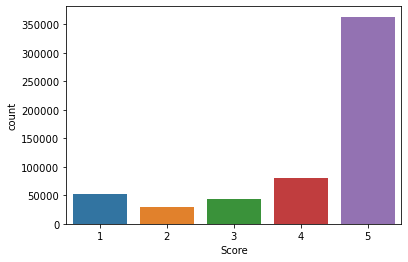

In [11]:
sns.countplot(x='Score', data=df)

In [12]:
df.ReviewText.isnull().sum()

0

In [13]:
x = df[["ReviewText"]]
y = df[["Score"]]

In [14]:
x

,ReviewText
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
568449,Great for sesame chicken..this is a good if no...
568450,I'm disappointed with the flavor. The chocolat...
568451,"These stars are small, so you can give 10-15 o..."
568452,These are the BEST treats for training and rew...


In [15]:
y

,Score
0,5
1,1
2,4
3,2
4,5
...,...
568449,5
568450,2
568451,5
568452,5


#### Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=50)

In [17]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [18]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

### Text Preprocessing Steps
    Text Preprocessing steps include some essential tasks to clean and remove the noise from the available data.

#### Removing Special Characters and Punctuation

#### Converting to Lower Case 
- We convert the whole text corpus to lower case to reduce the size of the vocabulary of our text data.

#### Removing Stop Words
- Stopwords don't contribute to the meaning of a sentence. So, we can safely remove them without changing the meaning of the sentence. For eg: it, was, any, then, a, is, by, etc are the stopwords.

#### Stemming or Lemmatization
- Stemming is the process of getting the root form of a word. For eg: warm, warmer, warming can be converted to warm.

Text preprocessing will further contain a sequence of steps: 1. Converting to lower-case. 2. Removing HTML Tags. 3. Removing Special Characters. 4. Removing Stop Words. 5. Stemming (Snowball Stemming)

In [19]:
def preprocess(raw_text,flag):
    
    # Remove Special Characters
    sentence = re.sub("[^a-zA-z]"," ",raw_text)
    
    # Convert to Lower Case
    sentence = sentence.lower()
    
    # Tokenizing the sentence
    tokens = sentence.split()
    
    # Remove StopWords
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming / Lemmatizing
    if flag == "stem" :
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
        
    return pd.Series([" ".join(clean_tokens),len(clean_tokens)])

In [20]:
x_train

,ReviewText
362118,Has anyone ever counted the K-cups in a box? ...
168036,"Oh, my gosh, these things are almost too good...."
519516,The Gloria Jeans Hazelnut Coffee is a nice ric...
464924,I LOVED this cheese. I am not always a fan of ...
320203,Although not as good as fresh brewed coffee th...
...,...
385247,"Before I go any further in this review, I have..."
321581,My morkie is soooo fussy - he hates everything...
441738,I excitedly bought this sauce before I realize...
239551,You can not find a better bargin than Amazon o...


###  Train Preprocess

In [21]:
x_train_df = x_train["ReviewText"].progress_apply(lambda x : preprocess(x,"stem"))

x_train_df.head()

 14%|██████████                                                               | 58431/426241 [27:10<2:51:06, 35.83it/s]


KeyboardInterrupt: 

In [3]:
x_train_df = pd.read_csv("C:/Users/saiki/Downloads/x_train_df/x_train_df")

x_train_df

,Unnamed: 0,Review_text,len_text
0,195720,morn addict coffe drink green tea year tri man...,31
1,555934,left packag feedback upon review issu appear q...,56
2,99591,way salti orang hue tast discusst bought obvio...,16
3,160146,tast similar lipton loos leaf tea prefer kind ...,18
4,483074,think might good cat food cat love alway left ...,20
...,...,...,...
426335,385156,must somehow miss design pod brew system thoug...,102
426336,321502,smooth never bitter wonder low acid coffe prob...,12
426337,441633,big fan natur balanc grain free formula small ...,25
426338,239499,cooki ridicul know kind chocol chunk got riche...,53


In [4]:
x_train_df.drop("Unnamed: 0",axis = 1, inplace = True)

In [5]:
x_train_df

,Review_text,len_text
0,morn addict coffe drink green tea year tri man...,31
1,left packag feedback upon review issu appear q...,56
2,way salti orang hue tast discusst bought obvio...,16
3,tast similar lipton loos leaf tea prefer kind ...,18
4,think might good cat food cat love alway left ...,20
...,...,...
426335,must somehow miss design pod brew system thoug...,102
426336,smooth never bitter wonder low acid coffe prob...,12
426337,big fan natur balanc grain free formula small ...,25
426338,cooki ridicul know kind chocol chunk got riche...,53


In [6]:
y_train_df = pd.read_csv("C:/Users/saiki/Downloads/y_train_df/y_train_df")
y_train_df.drop("Unnamed: 0",axis = 1, inplace = True)
y_train_df

,score
0,5
1,1
2,1
3,2
4,4
...,...
426335,3
426336,5
426337,1
426338,5


In [7]:
temp_train_df = pd.concat([x_train_df,y_train_df],axis = 1)
temp_train_df.drop(temp_train_df[temp_train_df.Review_text.isnull() == True].index, inplace = True)

In [8]:
x_train_df = temp_train_df[["Review_text","len_text"]]

In [9]:
y_train_df = temp_train_df[["score"]]

In [10]:
x_train_df.head()

,Review_text,len_text
0,morn addict coffe drink green tea year tri man...,31
1,left packag feedback upon review issu appear q...,56
2,way salti orang hue tast discusst bought obvio...,16
3,tast similar lipton loos leaf tea prefer kind ...,18
4,think might good cat food cat love alway left ...,20


In [11]:
y_train_df.head()

,score
0,5
1,1
2,1
3,2
4,4


### Test Preprocess

In [12]:
x_test_df = x_test["Review_text"].progress_apply(lambda x : preprocess(x,"stem"))

x_test_df.head()

NameError: name 'x_test' is not defined

In [13]:
x_test_df.columns = ["clean_review_text","text_length"]

NameError: name 'x_test_df' is not defined

In [14]:
x_test_df = pd.read_csv("C:/Users/saiki/Downloads/x_test_df/x_test_df")

x_test_df

,Unnamed: 0,0,1
0,111074,izz great tast refresh beverag percent fruit j...,134
1,99817,bought berri nut mix look tasti instead percie...,42
2,353268,powder good contain horribl tap top clear disp...,13
3,487407,soup great bit salti like otherwis nice tast p...,14
4,178080,dog gobbl food look realli fresh healthi actua...,13
...,...,...,...
142109,219060,gave gift chocol lover love actual hid everybo...,26
142110,136928,best cake mix found well know may find better,9
142111,232091,well product good residu tag antler care want ...,25
142112,524998,know cooki good sort bland tast littl cannot d...,42


In [15]:
x_test_df.drop("Unnamed: 0",axis = 1, inplace = True)

In [16]:
x_test_df.columns = ["clean_review_text","text_length"]

In [17]:
x_test_df.head()

,clean_review_text,text_length
0,izz great tast refresh beverag percent fruit j...,134
1,bought berri nut mix look tasti instead percie...,42
2,powder good contain horribl tap top clear disp...,13
3,soup great bit salti like otherwis nice tast p...,14
4,dog gobbl food look realli fresh healthi actua...,13


In [18]:
y_test_df = pd.read_csv("C:/Users/saiki/Downloads/y_test_df/y_test_df")
y_test_df.drop("Unnamed: 0",axis = 1, inplace = True)
y_test_df

,score
0,4
1,4
2,3
3,3
4,5
...,...
142109,5
142110,4
142111,3
142112,1


In [19]:
temp_test_df = pd.concat([x_test_df,y_test_df],axis = 1)
temp_test_df.drop(temp_test_df[temp_test_df.clean_review_text.isnull() == True].index, inplace = True)

In [20]:
x_test_df = temp_test_df[["clean_review_text","text_length"]]

In [21]:
y_test_df = temp_test_df[["score"]]

In [22]:
x_test_df

,clean_review_text,text_length
0,izz great tast refresh beverag percent fruit j...,134
1,bought berri nut mix look tasti instead percie...,42
2,powder good contain horribl tap top clear disp...,13
3,soup great bit salti like otherwis nice tast p...,14
4,dog gobbl food look realli fresh healthi actua...,13
...,...,...
142109,gave gift chocol lover love actual hid everybo...,26
142110,best cake mix found well know may find better,9
142111,well product good residu tag antler care want ...,25
142112,know cooki good sort bland tast littl cannot d...,42


In [23]:
y_test_df

,score
0,4
1,4
2,3
3,3
4,5
...,...
142109,5
142110,4
142111,3
142112,1


### Bag of Words

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

x_train_bow = vocab.fit_transform(x_train_df["Review_text"])

In [25]:
x_test_bow = vocab.transform(x_test_df["clean_review_text"])

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_bow, y_train_df)

C:\Users\saiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\saiki\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
y_test_pred = classifier.predict(x_test_bow)

In [28]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test_df, y_test_pred))

print(classification_report(y_test_df, y_test_pred))

0.7296399515806661
              precision    recall  f1-score   support

           1       0.65      0.64      0.65     13002
           2       0.42      0.21      0.28      7402
           3       0.46      0.27      0.34     10720
           4       0.51      0.23      0.31     20049
           5       0.78      0.95      0.86     90919

    accuracy                           0.73    142092
   macro avg       0.56      0.46      0.49    142092
weighted avg       0.69      0.73      0.69    142092



# Multinomial Naive Bayes

In [29]:
 # import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [30]:
%time nb.fit(x_train_bow,y_train_df)

C:\Users\saiki\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Wall time: 498 ms


MultinomialNB()

In [31]:
y_pred_class_nb = nb.predict(x_test_bow)

In [38]:
from sklearn import metrics
metrics.accuracy_score(y_test_df, y_pred_class_nb)

0.6932480364834052

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_bow, y_train_df)

C:\Users\saiki\AppData\Local\Temp/ipykernel_832/190730892.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(x_train_bow, y_train_df)


RandomForestClassifier()

In [35]:
y_pred_class_rf = classifier.predict(x_test_bow)

In [37]:
from sklearn import metrics
metrics.accuracy_score(y_test_df, y_pred_class_rf)

0.7939081721701433

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_bow, y_train_df)

DecisionTreeClassifier()

In [40]:
y_pred_dt = classifier.predict(x_test_bow)

In [41]:
metrics.accuracy_score(y_test_df, y_pred_dt)

0.7457984967485854